In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

# linear regression

In [3]:
num_points = 500
a = 5
b = 1
noise = np.random.normal(0, 1, num_points)
x = np.random.uniform(0, 3, num_points)
y = a * x + b + noise

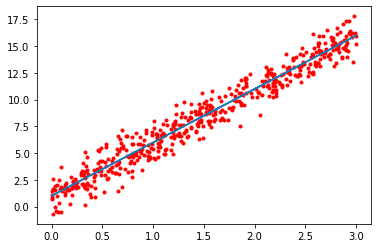

In [4]:
plt.scatter(x, y, marker = '.', color = 'r')
plt.plot(x, a*x + b)

In [5]:
def cost_function(X, y, a, b):
    return sum(((x*a + b) - y)**2) / (2 * len(X))

In [6]:
a1 = 1
b1 = 0
learning_rate = 0.1

n = len(x)
for i in range(200):
    a1 = a1 - learning_rate * np.sum(((x*a1 + b1) - y) * x)/n
    b1 = b1 - learning_rate * np.sum(((x*a1 + b1) - y))/n
cost = cost_function(x, y, a1, b1)

In [7]:
print(f' cost = {cost}')
print(f' a1 = {a1}, a = {a}')
print(f' b1 = {b1}, b = {b}')

 cost = 0.49816048307548166
 a1 = 4.999271277163949, a = 5
 b1 = 0.9768019485072561, b = 1


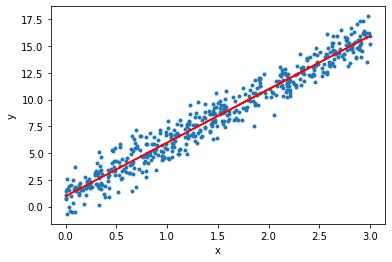

In [8]:
plt.plot(x, a1*x+b1, color='r')
plt.scatter(x, y, marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# logistic regression

In [9]:
mean1 = [-3, 0]
cov1 = [[2, -1], 
        [-1, 1]]

mean2 = [1, 3]
cov2 = [[1, 0], 
        [0, 3]]

In [10]:
x1 = np.random.multivariate_normal(mean1, cov1, num_points)
x2 = np.random.multivariate_normal(mean2, cov2, num_points)

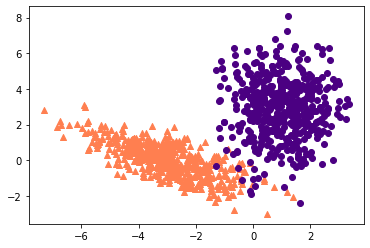

In [11]:
plt.scatter(x1[:, 0], x1[:, 1], marker = '^', color='coral')
plt.scatter(x2[:, 0], x2[:, 1], marker = 'o', color='indigo')

In [12]:
x = np.concatenate([x1, x2])
y = np.array([0]*num_points + [1]*num_points)

In [13]:
idx = np.arange(len(x))
np.random.shuffle(idx)
x = x[idx]
y = y[idx]

In [14]:
X_train = x[:int(0.7*len(x))]
X_test = x[int(0.7*len(x)):]
y_train = y[:int(0.7*len(y))]
y_test = y[int(0.7*len(y)):]

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
def fit(X, y, a, b):
    y_hat = sigmoid(X.dot(a) + b)
    cost = -(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat)).mean()  

    da = np.dot(X.T, (y_hat - y)) / len(X)
    db = np.sum(y_hat - y) / len(X)
        
    cost = np.squeeze(cost)
        
    return da, db, cost

In [17]:
def predict(X, a, b):
    y_hat = sigmoid(np.dot(X, a) + b)
    y_pred = np.where(y_hat >= 0.5, 1, 0)
    return y_pred

In [18]:
a = np.zeros(x.shape[1])
b = 0
iterations = 1500
alpha = 0.1

for iter in range(iterations):
    da, db, cost = fit(X_train, y_train, a, b)
    a = a - alpha * da
    b = b - alpha * db

In [19]:
predictions = predict(X_test, a, b)

In [20]:
def accuracy_score(y, y_pred):
    return sum(y == y_pred)/len(y)

In [21]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9866666666666667